In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
print("Dataset head:")
print(df.head())
print("\nDataset description:")
print(df.describe())

Dataset head:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Dataset description:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.7

In [4]:
X = df[['bmi']] 
y = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
print("\nEvaluation Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")



Evaluation Metrics:
MAE: 52.26
MSE: 4061.83
RMSE: 63.73
R² Score: 0.23


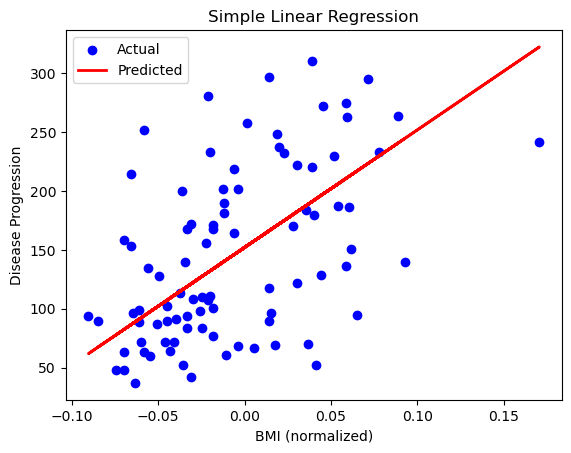

In [9]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('BMI (normalized)')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

In [10]:
print("\nModel Coefficients:")
print(f"Slope (coefficient): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print("\nInterpretation: For each unit increase in BMI, disease progression increases by", 
      f"{model.coef_[0]:.2f} units (holding all else constant).")


Model Coefficients:
Slope (coefficient): 998.58
Intercept: 152.00

Interpretation: For each unit increase in BMI, disease progression increases by 998.58 units (holding all else constant).


In [11]:
print("\n\nMultiple Linear Regression Example:")
X_multi = df.drop('target', axis=1)
y_multi = df['target']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)



Multiple Linear Regression Example:


LinearRegression()

In [12]:
y_pred_multi = model_multi.predict(X_test_m)


In [13]:
print("\nEvaluation Metrics for Multiple Regression:")
print(f"MAE: {mean_absolute_error(y_test_m, y_pred_multi):.2f}")
print(f"MSE: {mean_squared_error(y_test_m, y_pred_multi):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_m, y_pred_multi)):.2f}")
print(f"R² Score: {r2_score(y_test_m, y_pred_multi):.2f}")


Evaluation Metrics for Multiple Regression:
MAE: 42.79
MSE: 2900.19
RMSE: 53.85
R² Score: 0.45


In [14]:
print("\nMultiple Regression Coefficients:")
for feature, coef in zip(data.feature_names, model_multi.coef_):
    print(f"{feature}: {coef:.2f}")


Multiple Regression Coefficients:
age: 37.90
sex: -241.96
bmi: 542.43
bp: 347.70
s1: -931.49
s2: 518.06
s3: 163.42
s4: 275.32
s5: 736.20
s6: 48.67
